## > Gerando data sensível falsa.

In [1]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_mix2_treino.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_mix2_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dataset_dados_sensiveis_mix2.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_sensitive_only(name="apenas_dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)

### Imports de bibliotecas importantes

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from plot_history_helper import plot_history_accuracy, plot_history_loss
from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
# clear_session() -> limpa o estado da antiga sessão.

## > Lendo CSV e criando dados de teste e treino com 3 colunas para o modelo.

### Lendo dados de treinamento

In [3]:
clear_session()
# SESSÃO DE TREINAMENTO.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
#X_train = pd.read_csv("./dados_sensiveis_mix_treino.csv")
X_train = pd.read_csv("./dados_sensiveis_mix2_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# # Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

print(X_train)

y_train = X_train["Classe"]
X_train.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values
# FIM SESSÃO DE TREINAMENTO.

                   Coluna A         Coluna B  \
0    carlos-eduardoteixeira    Android 2.3.7   
1         Vinicius da Rocha  213148489169680   
2                   gcampos    Android 2.3.1   
3            Yasmin Correia     562727470873   
4            nascimentocaua    Android 4.0.3   
..                      ...              ...   
994           moraesgabriel      Android 2.1   
995              evelyndias      Android 2.1   
996                  vnunes    Android 2.3.4   
997     maria-fernandaramos      Android 2.2   
998             Isaac Pires    4853578298166   

                              Coluna C  Classe  
0                        Fonoaudiólogo       0  
1                         31 3959-2294       1  
2             Engenheiro de computação       0  
3                     +55 81 7134 5517       1  
4    Engenheiro de produto ou produção       0  
..                                 ...     ...  
994                       Farmacêutico       0  
995                 Técnico em 

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_952\2893660375.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Lendo dados de teste.

In [4]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
#X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
#X_test = pd.read_csv("./apenas_dados_sensiveis_teste.csv")
X_test = pd.read_csv("./dados_sensiveis_mix2_teste.csv")

X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

#print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

print(X_test)

y_test = X_test["Classe"]
X_test.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values
# FIM SESSÃO DE TESTE.

                 Coluna A        Coluna B                           Coluna C  \
0     Maria Clara Cardoso    502030044882                       11 4693-8865   
1     Srta. Emilly Moraes  38491578332477                   +55 41 2708-3266   
2        rochamaria-alice     Android 4.2            Catador de carangueijos   
3            Lívia Araújo  30330547483516                +55 (021) 0270-2059   
4    joao-gabrielferreira     Android 6.0                          Comprador   
..                    ...             ...                                ...   
994     da-rochaana-laura     Android 1.0                     Reumatologista   
995        ana-carolina36   Android 4.4.3            Catador de carangueijos   
996            enzobarros     Android 3.1                            Nadador   
997         elisada-cunha   Android 3.2.1  Agente de defesa sanitária animal   
998         almeidaemilly     Android 4.1               Lutador de jiu-jitsu   

     Classe  
0         1  
1         1

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_952\3383185031.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criação de modelo utilizando ativador sigmoid(x) = 1 / (1 + exp(-x))

In [5]:
from keras import layers

clear_session()

print(X_train.shape[1])
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='hard_sigmoid'))
model.add(keras.layers.Dense(8, activation='hard_sigmoid'))
model.add(keras.layers.Dense(8, activation='hard_sigmoid'))
model.add(keras.layers.Dense(1, activation='hard_sigmoid'))
# Configurando o modelo de treinamento.
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=[
    keras.metrics.TruePositives(name='true_positives'),
    keras.metrics.FalsePositives(name='false_positives'),
    keras.metrics.TrueNegatives(name='true_negatives'),
    keras.metrics.FalseNegatives(name='false_negatives'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    ]
  )
model.summary() # Mostra os paramestros disponíveis para treinar

3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable 

### Treinamento e teste do modelo.

In [43]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history, plot_pie
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 10, restore_best_weights = True)

#Treinando o modelo.
#history = model.fit(
#  X_train,
#  y_train,
#  epochs=100,
#  verbose=2,
#)

#Mostrando resultados do treinamento com dataset de train.
#pd.DataFrame(history.history).plot(figsize=(8,5))
#plot.show()

# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=225,
  verbose=True,
  validation_data=(X_test, y_test),
  batch_size=25,
  callbacks =[earlystopping]
)

ImportError: cannot import name 'plot_pie' from 'plot_history_helper' (d:\dev\projects\TCC-2\jupyter-notebook\final\plot_history_helper.py)

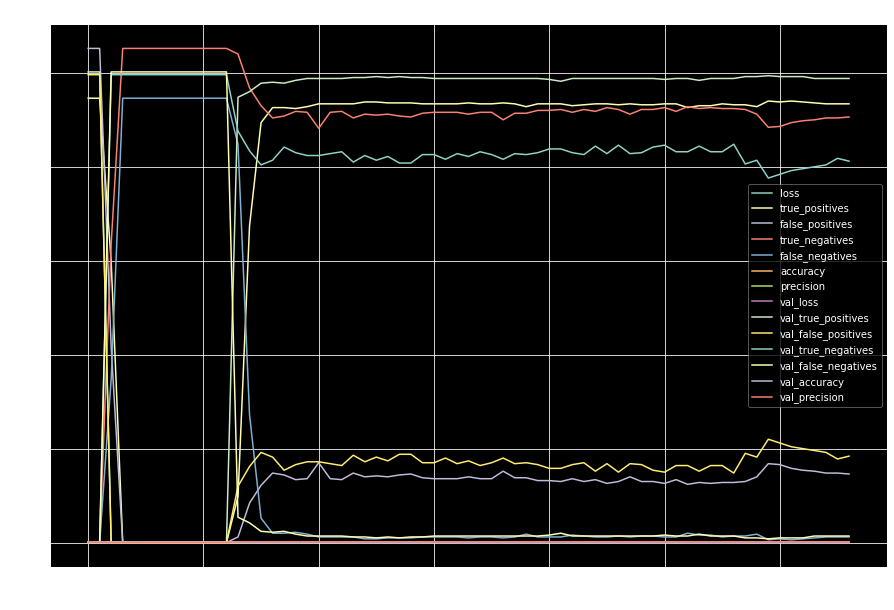

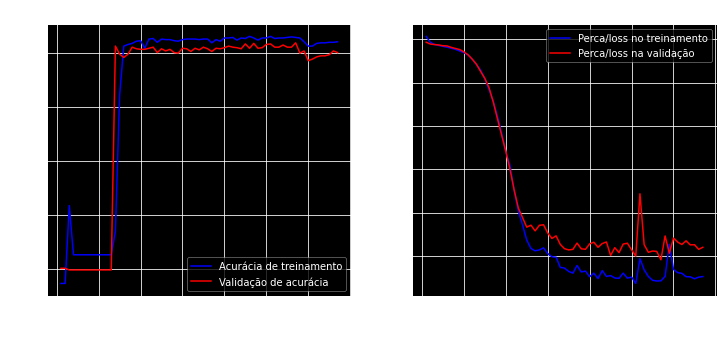

In [7]:
# Mostrando resultados do treinamento com dataset de train.
df = pd.DataFrame(history.history).plot(figsize=(15,10))
plot.xlabel('Épocas')
plot.ylabel('Tamanho Amostra')
plot.title('Modelo no Treinamento')
plot.show()

plot_history(history)
print()

### Realizando a Avaliação do modelo utilizando os dados de teste.

In [8]:

loss, tp, fp, tn, fn, accuracy, precision = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
#loss, accuracy = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
print(f"Acurácia no teste: {accuracy}")
print(f"Perca no teste: {loss}")

32/32 [==============================] - 0s 3ms/step - loss: 0.1912 - true_positives: 494.0000 - false_positives: 74.0000 - true_negatives: 424.0000 - false_negatives: 7.0000 - accuracy: 0.9189 - precision: 0.8697
Acurácia no teste: 0.9189189076423645
Perca no teste: 0.1911909580230713


### Realizando previsão no dataset de teste.

In [9]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable pa

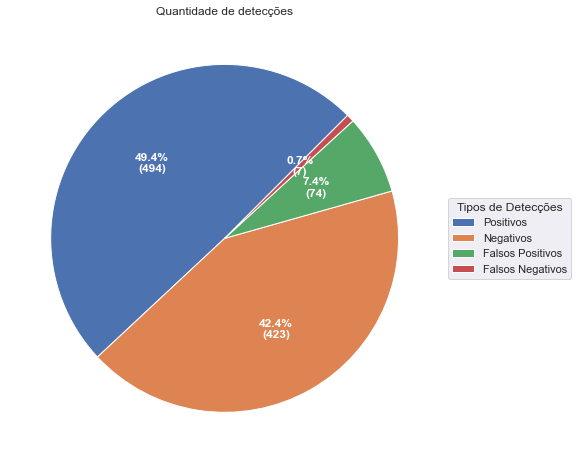

In [42]:
def foo(pct, allvals):
  absolute = int(pct/100.*np.sum(allvals))
  return "{:.1f}%\n({:d})".format(pct, absolute)

results = [
  "Positivos",
  "Negativos",
  "Falsos Positivos",
  "Falsos Negativos"
  ]

data = [tp, tn, fp, fn]

fig, ax = plot.subplots(figsize=(10,8), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: foo(pct, data), textprops=dict(color="w"), startangle=45)

ax.legend(wedges, results, title="Tipos de Detecções", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plot.setp(autotexts, size=12, weight="bold")

ax.set_title("Quantidade de detecções")

plot.show()


In [ ]:
plot_pie(data=[tp, tn, fp, fn])

In [10]:
dataset = pd.read_csv("./dataset_dados_sensiveis_mix2.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

#print(dataset)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                Coluna A          Coluna B                        Coluna C  \
0         Alana Silveira  6011934844785703                 (061) 8756 6703   
1       Isabelly da Cruz  3534303819623031                 (031) 7079-4123   
2       Davi Lucas Sales  6011175283214074                +55 71 8341-0201   
3                cda-luz     Android 2.3.1                  Meteorologista   
4      portomaria-sophia     Android 3.2.5  Engenheiro de telecomunicações   
..                   ...               ...                             ...   
994  Luiz Fernando Nunes  2623572190511924                    41 5899 0449   
995      Leonardo Aragão  4193265126993441                    11 6860-8378   
996            beatriz98       Android 1.6                     Metalúrgico   
997         Rafael Porto   180047992660830             +55 (031) 7497 5234   
998            leandro19       Android 4.1                     Retificador   

     Classe  
0         1  
1         1  
2         1  
3      

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_952\327360995.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


In [11]:
# Mostrando as previsões
for i in range(len(X_test)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, y_test={y_test[i]}")

X=[  8 445  72] Previsão=[0.02460426], y_test=1
X=[216 146  29] Previsão=[0.23816267], y_test=1
X=[ 97 427 300] Previsão=[0.29349852], y_test=0
X=[580 499 723] Previsão=[0.35332483], y_test=1
X=[880 513 621] Previsão=[0.38584584], y_test=0
X=[665 526 840] Previsão=[0.39765862], y_test=0
X=[887 542 532] Previsão=[0.40935513], y_test=1
X=[485 524 788] Previsão=[0.42595023], y_test=1
X=[917 525 702] Previsão=[0.4421561], y_test=1
X=[253 462 122] Previsão=[0.458362], y_test=1
X=[947 519 745] Previsão=[0.47456786], y_test=0
X=[390 349 443] Previsão=[0.48963678], y_test=0
X=[789 527 826] Previsão=[0.50226814], y_test=1
X=[307 291 445] Previsão=[0.5148995], y_test=1
X=[342 169 483] Previsão=[0.52753097], y_test=1
X=[356 298 253] Previsão=[0.54016215], y_test=0
X=[839 494 746] Previsão=[0.5527936], y_test=1
X=[115  73 218] Previsão=[0.5654249], y_test=0
X=[808 538 736] Previsão=[0.5780563], y_test=0
X=[304 203 316] Previsão=[0.57775205], y_test=0
X=[931 529 515] Previsão=[0.573917], y_test=0
X

### Realizando uma previsão com um dataset com dados sensíveis misturados com dados não sensíveis.

In [12]:
dataset = pd.read_csv("./dataset_dados_sensiveis_mix2.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

print(dataset)

# Fazendo o pré processamento.
#le = preprocessing.LabelEncoder()
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                Coluna A          Coluna B                        Coluna C  \
0         Alana Silveira  6011934844785703                 (061) 8756 6703   
1       Isabelly da Cruz  3534303819623031                 (031) 7079-4123   
2       Davi Lucas Sales  6011175283214074                +55 71 8341-0201   
3                cda-luz     Android 2.3.1                  Meteorologista   
4      portomaria-sophia     Android 3.2.5  Engenheiro de telecomunicações   
..                   ...               ...                             ...   
994  Luiz Fernando Nunes  2623572190511924                    41 5899 0449   
995      Leonardo Aragão  4193265126993441                    11 6860-8378   
996            beatriz98       Android 1.6                     Metalúrgico   
997         Rafael Porto   180047992660830             +55 (031) 7497 5234   
998            leandro19       Android 4.1                     Retificador   

     Classe  
0         1  
1         1  
2         1  
3      

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_952\2395168444.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


### Previsão

In [13]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(dataset) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable pa

In [14]:
# Mostrando as previsões
for i in range(len(dataset)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, classe={classes[i]}")

X=[0 0 0] Previsão=[0.02460426], classe=1
X=[1 1 1] Previsão=[0.23816267], classe=1
X=[2 2 2] Previsão=[0.29349852], classe=1
X=[3 3 3] Previsão=[0.35332483], classe=0
X=[4 4 4] Previsão=[0.38584584], classe=0
X=[5 5 5] Previsão=[0.39765862], classe=0
X=[6 6 6] Previsão=[0.40935513], classe=0
X=[7 7 7] Previsão=[0.42595023], classe=0
X=[8 8 8] Previsão=[0.4421561], classe=0
X=[9 9 9] Previsão=[0.458362], classe=1
X=[10 10 10] Previsão=[0.47456786], classe=0
X=[11 11 11] Previsão=[0.48963678], classe=1
X=[12 12 12] Previsão=[0.50226814], classe=0
X=[13 13 13] Previsão=[0.5148995], classe=1
X=[14 14 14] Previsão=[0.52753097], classe=1
X=[15 15 15] Previsão=[0.54016215], classe=1
X=[16 16 16] Previsão=[0.5527936], classe=0
X=[17 17 17] Previsão=[0.5654249], classe=1
X=[18 18 18] Previsão=[0.5780563], classe=0
X=[19 19 19] Previsão=[0.57775205], classe=1
X=[20 20 20] Previsão=[0.573917], classe=0
X=[21 21 21] Previsão=[0.57118887], classe=1
X=[22 22 22] Previsão=[0.5764499], classe=0
X=[23

### Análisando apenas as previsões feita pelo modelo.

### Detecção de outliers usando Desvio Padrão.

Como um padrão para quase todo dataset, pelo menos 90.7% dele esta entre três tipos de desvio padrão, com os outliers perto de 0.3% do tamanho do dataset.

Média dos valores: 
predict    0.465598
dtype: float32

Desvio de padrão dos valores: 
predict    0.437073
dtype: float32


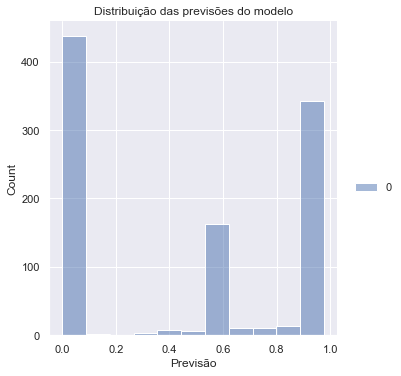

In [15]:

import seaborn as sns

df_predicted = pd.DataFrame(predict_x, columns=['predict'])

sns.set_theme()
sns.displot(data=predict_x).set(title="Distribuição das previsões do modelo", xlabel="Previsão")

print(f'Média dos valores: \n{df_predicted.mean()}')
print()
print(f'Desvio de padrão dos valores: \n{df_predicted.std()}')

### Utilizando o limite inferior: média(μ - 3 * σ) e o limite superior: média(μ + 3 * σ) para encontrar os outliers no database.

In [16]:
lower_limit = df_predicted.mean() - 3 * df_predicted.std()
upper_limit = df_predicted.mean() + 3 * df_predicted.std()

In [17]:
lower_limit

predict   -0.84562
dtype: float32

In [18]:
upper_limit

predict    1.776816
dtype: float32

In [19]:
df_scores_filtered=df_predicted[(df_predicted['predict'] > lower_limit['predict']) & (df_predicted['predict'] < upper_limit['predict'])]
df_scores_filtered

,predict
0,0.024604
1,0.238163
2,0.293499
3,0.353325
4,0.385846
...,...
994,0.977346
995,0.977346
996,0.000000
997,0.977346


### Utilizando Z-Score

In [20]:
df_predicted['z_score']=(df_predicted['predict'] - df_predicted['predict'].mean())/df_predicted['predict'].std()
df_predicted.head()

,predict,z_score
0,0.024604,-1.008971
1,0.238163,-0.520360
2,0.293499,-0.393755
3,0.353325,-0.256875
4,0.385846,-0.182469


In [21]:
df_scores_filtered= df_predicted[(df_predicted['z_score']>-3) & (df_predicted['z_score']<3)]
print(df_scores_filtered)

      predict   z_score
0    0.024604 -1.008971
1    0.238163 -0.520360
2    0.293499 -0.393755
3    0.353325 -0.256875
4    0.385846 -0.182469
..        ...       ...
994  0.977346  1.170853
995  0.977346  1.170853
996  0.000000 -1.065264
997  0.977346  1.170853
998  0.000000 -1.065264

[999 rows x 2 columns]


### Utilizando IRQ para avaliar os predict

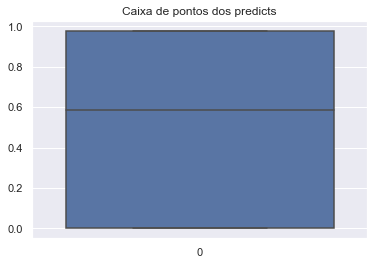

In [22]:
sns.boxplot(data=predict_x).set(title="Caixa de pontos dos predicts")
df_predicted = pd.DataFrame(predict_x, columns=['predict'])

In [23]:
df_predicted.describe()

,predict
count,999.000000
mean,0.465598
std,0.437073
min,0.000000
25%,0.000000
50%,0.587319
75%,0.977346
max,0.977346


In [24]:
IQR = (9.655807e-01)-(8.240152e-14)
print(f'IRQ: {IQR}')
lower_limit = (8.240152e-14) - (1.5*IQR)
upper_limit = (9.655807e-01) + (1.5*IQR)
print(upper_limit)
print(lower_limit)

IRQ: 0.9655806999999176
2.4139517499998764
-1.448371049999794


In [25]:
df_scores_filtered = df_predicted[(df_predicted['predict']>lower_limit) & (df_predicted['predict']<upper_limit)]
print(df_scores_filtered)

      predict
0    0.024604
1    0.238163
2    0.293499
3    0.353325
4    0.385846
..        ...
994  0.977346
995  0.977346
996  0.000000
997  0.977346
998  0.000000

[999 rows x 1 columns]


### Encriptando o dataset.

In [49]:
import hashlib

def sha_512_hash(data):
  return hashlib.sha512(data.encode('utf-8')).hexdigest()

In [50]:
#import csv

#from encryption_box import rsa_encrypt
#from rsa_alg import RSA

#X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
#X_test.fillna(X_test.mean(), inplace=True)

#classes = X_test["Classe"]

#rsa_encrypt(predict_x, X_test, classes)

In [51]:
import csv
from rsa_alg import RSA

X_test = pd.read_csv("./dados_sensiveis_mix2_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

classes = X_test["Classe"]

with open('dataset2_encriptado_hard_sigmoid.csv', 'w',  newline='', encoding='utf-8') as csv_file:
  writer:object = csv.writer(csv_file)
  writer.writerow(['Coluna A', 'Coluna B', 'Coluna C'])
  rsa_alg = RSA(17, 41)
  rsa_alg.calc_n()
  rsa_alg.calc_euler_totient()
  rsa_alg.calc_public_key(15)
  for index in range(1, 1000-1):
    if(round(predict_x[index][0]) == classes[index]):
      # Encriptando os dados.
      r1 = rsa_alg.encrypt_message(X_test['Coluna A'][index])
      r2 = rsa_alg.encrypt_message(X_test['Coluna B'][index])
      r3 = rsa_alg.encrypt_message(X_test['Coluna C'][index])
      # Encriptando
      encrypted_a: str = ''.join(str(x) for x in r1)
      encrypted_b: str = ''.join(str(y) for y in r2)
      encrypted_c: str = ''.join(str(z) for z in r3)
      # Escrevendo no arquivo.
      writer.writerow([
        encrypted_a,
        encrypted_b,
        encrypted_c
        ])
    else:
      writer.writerow([X_test['Coluna A'][index], X_test['Coluna B'][index], X_test['Coluna C'][index]])

rochamaria-alice
Android 4.2
Catador de carangueijos
joao-gabrielferreira
Android 6.0
Comprador
alima
Android 1.0
Argumentista
frodrigues
Android 3.1
Mãe social
isaaccunha
Android 8.1.0
Moldador
da-cruzjulia
Android 10
Pára-quedista
ksilveira
Android 5.0
Redator
costalorena
Android 3.2.4
Diretor de produção
brenoazevedo
Android 2.2.3
Lenhador
julialima
Android 2.3.2
Militar da Aeronáutica
walves
Android 2.2.3
Skatista
elisa32
Android 5.1
Prefeito
luigi10
Android 3.0
Cozinheira
clarice84
Android 2.2.3
Revendedor
nataliamartins
Android 6.0
Personal trainer
Srta. Evelyn da Costa
4856197734912154919
61 6209-5973
Maria Alice Pinto
4571555232301
(011) 1767 9408
Lavínia Lopes
180028800379615
+55 (011) 9094 0071
Danilo Viana
6515554145450541
+55 81 8475 7351
Ana Mendes
3532206246089159
(011) 9381 6029
Emanuelly da Mota
4836708142131436048
+55 (011) 5574-5400
Augusto Souza
30183329609752
(061) 4155-0892
Luiz Henrique Nunes
372165490160398
+55 81 5634-9300
Thomas da Cruz
3521738013967095
+55 (01

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_1564\4211168302.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


## Salvando o modelo na pasta models

In [29]:
filepath = "./model/hard_sigmoid_model"
model.save(filepath)
keras.models.load_model(filepath)

INFO:tensorflow:Assets written to: ./model/hard_sigmoid_model\assets


## Carregando o modelo da pasta models

In [30]:
model = tf.keras.models.load_model("./model/hard_sigmoid_model")